In [1]:
import csv
from datetime import datetime

def add_transaction():
    amount = float(input("Enter amount: "))
    category = input("Enter category (e.g. Food, Rent, Salary): ")
    t_type = input("Type? (income/expense): ").lower()
    date = datetime.now().strftime("%Y-%m-%d")
    
    with open("transactions.csv", mode="a", newline="") as file:
        writer = csv.writer(file)
        writer.writerow([date, category, amount, t_type]) 
    
    print("Transaction added!")

add_transaction()


Enter amount:  4000
Enter category (e.g. Food, Rent, Salary):  rent
Type? (income/expense):  expense


Transaction added!


In [2]:
import csv

def view_transactions():
    try:
        with open("transactions.csv", mode="r") as file:
            reader = csv.reader(file)
            transactions = list(reader)
            
            if not transactions:
                print("No transactions found.")
                return

            print(f"{'Date':<12} | {'Category':<15} | {'Amount':<10} | {'Type'}")
            print("-" * 50)
            for row in transactions:
                date, category, amount, t_type = row
                print(f"{date:<12} | {category:<15} | {amount:<10} | {t_type}")
    except FileNotFoundError:
        print("No transactions yet. File not found.")

view_transactions()


Date         | Category        | Amount     | Type
--------------------------------------------------
2025-06-22   | rent            | 4000.0     | expense


In [3]:
def summarize_transactions():
    try:
        with open("transactions.csv", mode="r") as file:
            reader = csv.reader(file)
            income_total = 0
            expense_total = 0

            for row in reader:
                if len(row) < 4:
                    continue  # Skip incomplete rows
                _, _, amount, t_type = row
                amount = float(amount)
                if t_type.lower() == "income":
                    income_total += amount
                elif t_type.lower() == "expense":
                    expense_total += amount

            net_balance = income_total - expense_total

            print("\n--- Summary ---")
            print(f"Total Income : ₹{income_total:.2f}")
            print(f"Total Expenses: ₹{expense_total:.2f}")
            print(f"Net Balance  : ₹{net_balance:.2f}")

    except FileNotFoundError:
        print("No transactions yet. File not found.")

summarize_transactions()



--- Summary ---
Total Income : ₹0.00
Total Expenses: ₹4000.00
Net Balance  : ₹-4000.00


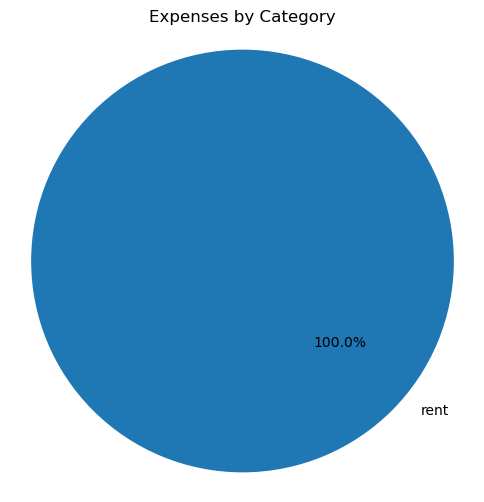

In [4]:
import matplotlib.pyplot as plt

def plot_expense_pie():
    try:
        with open("transactions.csv", mode="r") as file:
            reader = csv.reader(file)
            category_totals = {}

            for row in reader:
                if len(row) < 4:
                    continue
                _, category, amount, t_type = row
                amount = float(amount)

                if t_type.lower() == "expense":
                    category_totals[category] = category_totals.get(category, 0) + amount

            if not category_totals:
                print("No expense data to plot.")
                return

            labels = category_totals.keys()
            sizes = category_totals.values()

            plt.figure(figsize=(6,6))
            plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
            plt.title("Expenses by Category")
            plt.axis('equal')  # Keeps the pie chart circular
            plt.show()

    except FileNotFoundError:
        print("transactions.csv not found.")

plot_expense_pie()


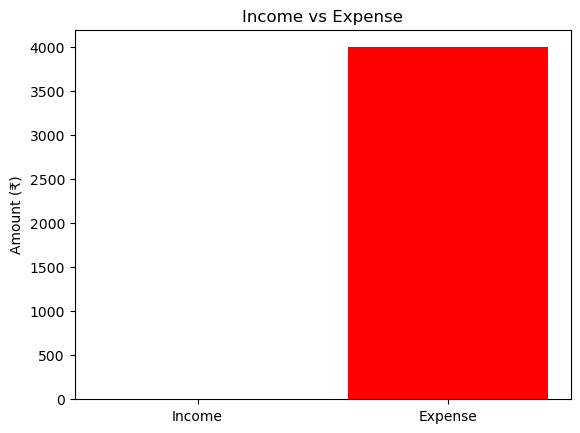

In [5]:
def plot_income_vs_expense():
    try:
        with open("transactions.csv", mode="r") as file:
            reader = csv.reader(file)
            income = 0
            expense = 0

            for row in reader:
                if len(row) < 4:
                    continue
                _, _, amount, t_type = row
                amount = float(amount)
                if t_type.lower() == "income":
                    income += amount
                elif t_type.lower() == "expense":
                    expense += amount

            labels = ['Income', 'Expense']
            values = [income, expense]
            colors = ['green', 'red']

            plt.bar(labels, values, color=colors)
            plt.title("Income vs Expense")
            plt.ylabel("Amount (₹)")
            plt.show()

    except FileNotFoundError:
        print("transactions.csv not found.")

plot_income_vs_expense()


In [6]:
def menu():
    while True:
        print("\n--- Personal Budget Tracker ---")
        print("1. Add Transaction")
        print("2. View Transactions")
        print("3. Show Summary")
        print("4. Show Expense Pie Chart")
        print("5. Show Income vs Expense Chart")
        print("6. Exit")
        choice = input("Choose an option (1-6): ")

        if choice == '1':
            add_transaction()
        elif choice == '2':
            view_transactions()
        elif choice == '3':
            summarize_transactions()
        elif choice == '4':
            plot_expense_pie()
        elif choice == '5':
            plot_income_vs_expense()
        elif choice == '6':
            print("Goodbye!")
            break
        else:
            print("Invalid choice. Try again.")

menu()


--- Personal Budget Tracker ---
1. Add Transaction
2. View Transactions
3. Show Summary
4. Show Expense Pie Chart
5. Show Income vs Expense Chart
6. Exit


Choose an option (1-6):  2


Date         | Category        | Amount     | Type
--------------------------------------------------
2025-06-22   | rent            | 4000.0     | expense

--- Personal Budget Tracker ---
1. Add Transaction
2. View Transactions
3. Show Summary
4. Show Expense Pie Chart
5. Show Income vs Expense Chart
6. Exit


Choose an option (1-6):  6


Goodbye!
